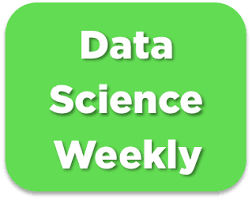

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨 

In [1]:
!pip install plotly

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')
#pio.templates.default = "jedha"
#pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE
#from IPython.display import display

# Read file with labels

In [2]:
url = "https://raw.githubusercontent.com/huynam1012/Data-miniprojets/main/conversion_data_train.csv"
data = pd.read_csv(url)
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [3]:
data.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# Explore dataset

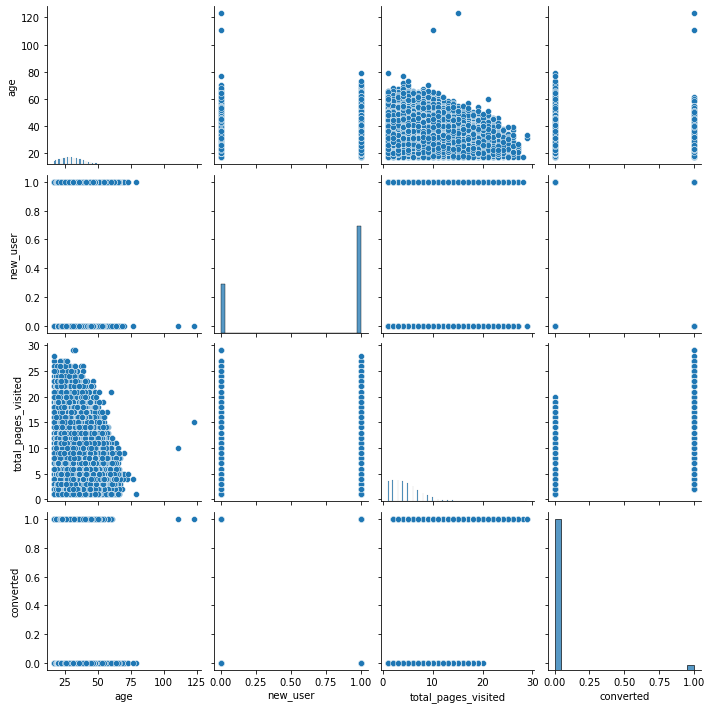

In [4]:
sns.pairplot(data)

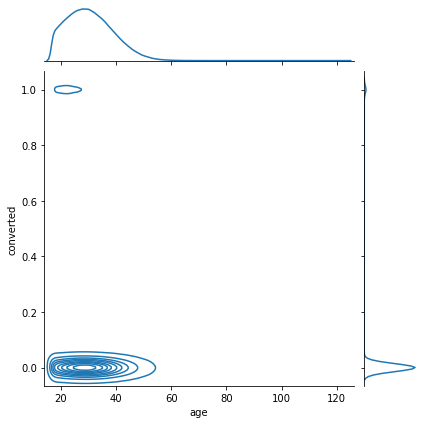

In [5]:
sns.jointplot(x="age", y="converted", kind="kde", data=data)

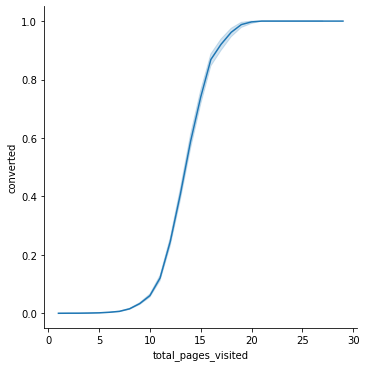

In [6]:
sns.relplot(x='total_pages_visited', y='converted', data=data, kind='line')

In [7]:
data["new_user"] = data["new_user"].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  object
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 13.0+ MB


In [8]:
target_name = 'converted'

print("Separating labels from features...")
X = data.loc[:,[c for c in data.columns if c!=target_name]] # All columns are kept, except the target
y = data.loc[:,target_name]

Separating labels from features...


In [9]:
X.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score, f1_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import plot_precision_recall_curve, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_confusion_matrix

from sklearn.feature_selection import chi2

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print("Train data shape of X = % s and y = % s : "%(X_train.shape, y_train.shape))
print("Test data shape of X = % s and y = % s : "%(X_test.shape, y_test.shape))

Train data shape of X = (227664, 5) and y = (227664,) : 
Test data shape of X = (56916, 5) and y = (56916,) : 


In [12]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'total_pages_visited']  at positions  [1, 4]
Found categorical features  ['country', 'new_user', 'source']  at positions  [0, 2, 3]


In [13]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
y_train = y_train.tolist()
y_test = y_test.tolist()
print("...Done")

Convert pandas DataFrames to numpy arrays...
...Done


In [14]:
numeric_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)
        ]
    )

In [16]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
#print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
#print(X_train[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.

Performing preprocessings on train set...
...Done.


In [17]:
classifiers = []
lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=40)
dtc = DecisionTreeClassifier()
svm = SVC(kernel='rbf', class_weight='balanced')
xgb = XGBClassifier(n_estimators=1, max_depth=3)
abc = AdaBoostClassifier(learning_rate=0.05, n_estimators=100)
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
bag = BaggingClassifier(RandomForestClassifier(),n_estimators=40, random_state=0)
knn = KNeighborsClassifier()
nb = GaussianNB()


classifiers.append(lr)
classifiers.append(rfc)
classifiers.append(dtc)
classifiers.append(svm)
classifiers.append(xgb)
classifiers.append(abc)
classifiers.append(gbc)
classifiers.append(bag)
classifiers.append(knn)
classifiers.append(nb)

In [18]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, cv=10, scoring= "accuracy"))

[03:59:44] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:59:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:59:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:59:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [19]:
results = pd.DataFrame({"Algorithm": ["Logistic Regression", "Random Forest", "Decision Tree", "Support Vector Machines",
                        "XGBoost", "Ada Boost", "Gradient Boosting","Bagging Classifier", "KNeighbors", "GaussianNB"],
             "Accuracy_mean": [cv_result.mean() for cv_result in cv_results],
             "Std": [cv_result.std() for cv_result in cv_results]})

results = results.sort_values(by="Accuracy_mean", ascending=False).style.background_gradient(cmap='Blues', subset=['Accuracy_mean'])
results

,Algorithm,Accuracy_mean,Std
0,Logistic Regression,0.986326,0.000768
6,Gradient Boosting,0.986129,0.000716
7,Bagging Classifier,0.984807,0.000655
8,KNeighbors,0.984754,0.000697
4,XGBoost,0.984512,0.000877
5,Ada Boost,0.984367,0.000582
1,Random Forest,0.984236,0.000735
2,Decision Tree,0.983889,0.000733
9,GaussianNB,0.978235,0.001192
3,Support Vector Machines,0.942573,0.001800


In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Train score of linear regression: {:.3f} \nTest score of linear regression: {:.3f}'.\
    format(lr.score(X_train, y_train), lr.score(X_test, y_test)))

Train score of linear regression: 0.986 
Test score of linear regression: 0.986


In [21]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [22]:
# Print accuracy scores
print('Accuracy score on training set of logistic regression: {:.3f} \nAccuracy score on test set of logistic regression: {:.3f}'.\
    format(accuracy_score(y_train, y_train_pred_lr), accuracy_score(y_test, y_test_pred_lr)))

Accuracy score on training set of logistic regression: 0.986 
Accuracy score on test set of logistic regression: 0.986


In [23]:
# Print accuracy scores
print('f1-score score on training set of logistic regression: {:.3f} \nf1-scorescore on test set of logistic regression: {:.3f}'.\
    format(f1_score(y_train, y_train_pred_lr), f1_score(y_test, y_test_pred_lr)))

f1-score score on training set of logistic regression: 0.765 
f1-scorescore on test set of logistic regression: 0.758


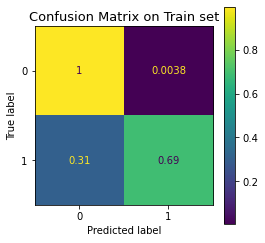

In [24]:
_ , ax = plt.subplots(figsize=(4,4))
ax.set_title("Confusion Matrix on Train set", fontdict={'fontsize': 13, 'fontweight': 'medium'})
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_lr, ax=ax, normalize = 'true')
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 16}
plt.rc('font', **font)
plt.show()

In [25]:
train_rep=classification_report(y_train, y_train_pred_lr, output_dict=True,
                                )

train_df=round(pd.DataFrame(train_rep).transpose(), 2)
train_df.head()

,precision,recall,f1-score,support
0,0.99,1.00,0.99,220334.00
1,0.86,0.69,0.77,7330.00
accuracy,0.99,0.99,0.99,0.99
macro avg,0.92,0.84,0.88,227664.00
weighted avg,0.99,0.99,0.99,227664.00


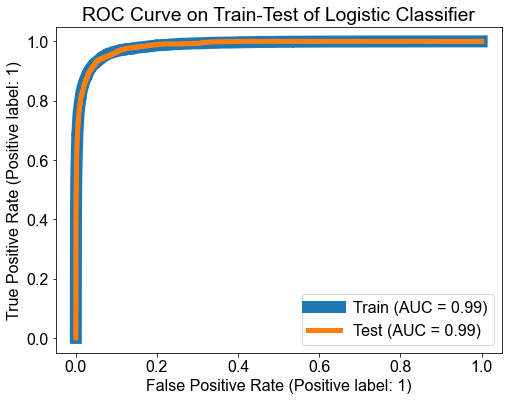

In [26]:
# Visualize ROC curves
_ , ax = plt.subplots(figsize = (8,6)) # Get subplot from matplotlib
ax.set(title="ROC Curve on Train-Test of Logistic Classifier") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(lr, X_train, y_train, ax=ax, lw=12, name="Train") # RocCurveDisplay from sklearn
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, lw=5, name="Test") # RocCurveDisplay from sklearn
plt.show()

In [27]:
y_test_prob_lr = lr.predict_proba(X_test)
y_train_prob_lr = lr.predict_proba(X_train)

In [29]:
preprocessed_features = numeric_features
cat_features_preprocessed = preprocessor.transformers_[1][1][1].get_feature_names_out()

preprocessed_features +=cat_features_preprocessed.tolist()
print(preprocessed_features)

['age', 'total_pages_visited', 'x0_Germany', 'x0_UK', 'x0_US', 'x1_1', 'x2_Direct', 'x2_Seo']


In [30]:
all_features = pd.DataFrame()
all_features['features'] = preprocessed_features
all_features['importance'] = lr.coef_[0]
all_features.head(5)

,features,importance
0,age,-0.606593
1,total_pages_visited,2.533677
2,x0_Germany,3.578119
3,x0_UK,3.411821
4,x0_US,3.085973


In [31]:
feature_importance = pd.DataFrame({"features": preprocessed_features, 
                                   "score": lr.coef_[0]}).sort_values(by="score", ascending=False)

#feature_importance["percentage"]= (feature_importance["score"]/feature_importance["score"].sum())*100
feature_importance   

,features,score
2,x0_Germany,3.578119
3,x0_UK,3.411821
4,x0_US,3.085973
1,total_pages_visited,2.533677
7,x2_Seo,0.024636
6,x2_Direct,-0.205552
0,age,-0.606593
5,x1_1,-1.740690


In [32]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
y = np.append(y_train,y_test)

lr.fit(X, y)


LogisticRegression()

In [33]:
print('Train score of linear regression: {:.3f} '.\
    format(lr.score(X, y)))

Train score of linear regression: 0.986 


In [34]:
# Read data without labels
url_test = "https://raw.githubusercontent.com/huynam1012/Data-miniprojets/main/conversion_data_test.csv"
data_without_labels = pd.read_csv(url_test)
print('Prediction set (without labels) :', data_without_labels.shape)
data_without_labels.head(2)

Prediction set (without labels) : (31620, 5)


,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5


In [35]:
data_without_labels["new_user"] = data_without_labels["new_user"].astype('str')
data_without_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31620 entries, 0 to 31619
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              31620 non-null  object
 1   age                  31620 non-null  int64 
 2   new_user             31620 non-null  object
 3   source               31620 non-null  object
 4   total_pages_visited  31620 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [36]:
# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
target_name = 'converted'
X_without_labels = data_without_labels.loc[:,[c for c in data.columns if c!=target_name]]

In [37]:
# Automatically detect positions of numeric/categorical features
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X_without_labels.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'total_pages_visited']  at positions  [1, 4]
Found categorical features  ['country', 'new_user', 'source']  at positions  [0, 2, 3]


In [38]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

Convert pandas DataFrames to numpy arrays...
...Done


In [39]:
numeric_transformer_1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])

categorical_transformer_1 = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [40]:
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_1, numeric_indices),
        ('cat', categorical_transformer_1, categorical_indices)
        ]
    )

In [41]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.3112874   3.32677112  0.          1.          0.          0.
   0.          1.        ]
 [-1.03716308  0.03803388  0.          1.          0.          1.
   1.          0.        ]
 [ 0.17262971 -1.15787057  0.          0.          0.          1.
   0.          1.        ]
 [ 0.17262971  0.33701     0.          0.          1.          1.
   0.          0.        ]
 [-0.67422524 -0.55991834  0.          0.          0.          0.
   0.          1.        ]]


In [42]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': lr.predict(X_without_labels)
}

y_predictions = pd.DataFrame(columns=['converted'], data=data)
y_predictions.to_csv('conversion_data_test_predictions_Huy-Nam_TRAN_1.csv', index=False)

In [43]:
data_without_labels["converted"] = lr.predict(X_without_labels)
data_without_labels.head(30)

,country,age,new_user,source,total_pages_visited,converted
0,UK,28,0,Seo,16,1
1,UK,22,1,Direct,5,0
2,China,32,1,Seo,1,0
3,US,32,1,Ads,6,0
4,China,25,0,Seo,3,0
5,US,18,1,Seo,1,0
6,China,43,0,Ads,7,0
7,UK,17,0,Seo,1,0
8,UK,44,1,Direct,6,0
9,US,41,1,Seo,5,0
